In [18]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

/Users/anh/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)

/Users/anh/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [7]:
# I made a mistake here and used X_train, not X_train_std
# It makes a huge difference! Number of misclassificaiton is 41
# instead of 4

ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [8]:
y_pred = ppn.predict(X_test_std)

In [9]:
print('Misclassified samples: {}'.format((y_test != y_pred).sum()))

Misclassified samples: 4


In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.91


# Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [50]:
# C = 1.0 (default) is the regularization strength
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [51]:
y_pred = lr.predict(X_test_std)

In [ ]:
lr.predict_proba

# SVM

In [12]:
from sklearn.svm import SVC

In [13]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

# SGDClassifier

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
ssn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

/Users/anh/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


# Kernel SVM

In [19]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

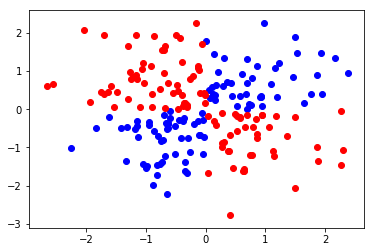

In [25]:
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='b')
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='r')

In [26]:
svm_radial = SVC(kernel='rbf')

In [27]:
svm_radial.fit(X_xor, y_xor)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

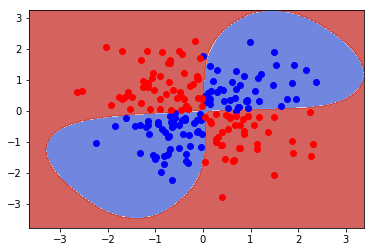

In [36]:
fig, ax = plt.subplots()
xx, yy = make_meshgrid(X_xor[:, 0], X_xor[:, 1])
plot_contours(ax, svm_radial, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='b')
ax.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='r')

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                             random_state = 0)

In [39]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

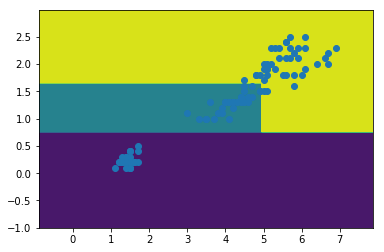

In [42]:
xx, yy = make_meshgrid(X_train, y_train)
fig, ax = plt.subplots()
plot_contours(ax, tree, xx, yy)
ax.scatter(X_train[:, 0], X_train[:, 1])

# Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(criterion='entropy',
                           n_estimators=10, random_state=1,
                           n_jobs=2)

In [46]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

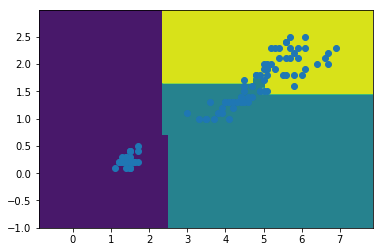

In [47]:
xx, yy = make_meshgrid(X_train, y_train)
fig, ax = plt.subplots()
plot_contours(ax, rf, xx, yy)
ax.scatter(X_train[:, 0], X_train[:, 1])